 ## This iterations will observe


1.   Vanilla network that serves the purpose of predicting MNIST dataset with no bound on the parameters



In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


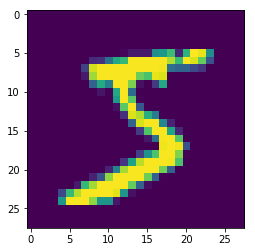

In [39]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [44]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1))) #26x26x16, RF 3x3

model.add(Conv2D(32, (3,3), activation='relu')) # 24x24x16 , RF 5x5
model.add(Conv2D(64, (3,3), activation='relu')) # 22x22x32 , RF 7x7

model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x32 , RF 14x14
model.add(Conv2D(16, (1, 1), activation='relu')) # 11x11x16

model.add(Conv2D(32, (3,3), activation='relu')) # 9x9x32 , RF 16x16
model.add(Conv2D(64, (3,3), activation='relu')) # 7x7x64 , RF 18x18 

model.add(Conv2D(16, 1, activation='relu')) # 7x7x16
model.add(Conv2D(10, 7)) # 1x1x10
model.add(Flatten()) # 1x10
model.add(Activation('softmax'))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 16)        1040      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 64)          18496     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1468 - acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0498 - acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0371 - acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0300 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0251 - acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0220 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0185 - acc: 0.9944
Epoch 8/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0162 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0145 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 11s 175us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [50]:
print(score)

[0.026077639121243782, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [52]:
print(y_pred[:9])
print(y_test[:9])

[[8.93401631e-14 3.77595732e-11 3.38203131e-06 9.91939952e-09
  1.58954081e-13 1.05425913e-14 3.22903071e-20 9.99996662e-01
  4.23368111e-11 2.49394123e-08]
 [3.00791309e-10 4.59482452e-12 1.00000000e+00 1.96340204e-15
  9.43693899e-17 1.36513119e-19 3.75661197e-10 9.58339165e-17
  6.64882862e-13 1.08165280e-17]
 [1.00377054e-10 9.99999642e-01 3.65188851e-10 3.44125634e-13
  3.18971644e-07 7.25534477e-08 5.37772316e-09 1.21419772e-08
  9.21047505e-09 2.51156068e-10]
 [9.99999881e-01 6.36033970e-16 1.25609043e-08 2.91456130e-11
  7.55743246e-11 1.15231922e-08 1.36819708e-07 9.14326861e-12
  6.24543617e-09 2.00301997e-08]
 [1.40549786e-14 5.88845223e-11 2.01114611e-13 2.95148216e-12
  1.00000000e+00 2.26505527e-17 1.81837145e-17 6.65850838e-14
  8.72237178e-12 2.05091055e-09]
 [2.49633821e-11 9.99999404e-01 6.49956089e-10 5.09679748e-14
  3.24573250e-07 4.16581686e-10 4.62212796e-10 2.37090404e-07
  1.19325909e-08 5.24469468e-10]
 [4.09585364e-26 2.58291435e-13 4.56963162e-14 4.73565424e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

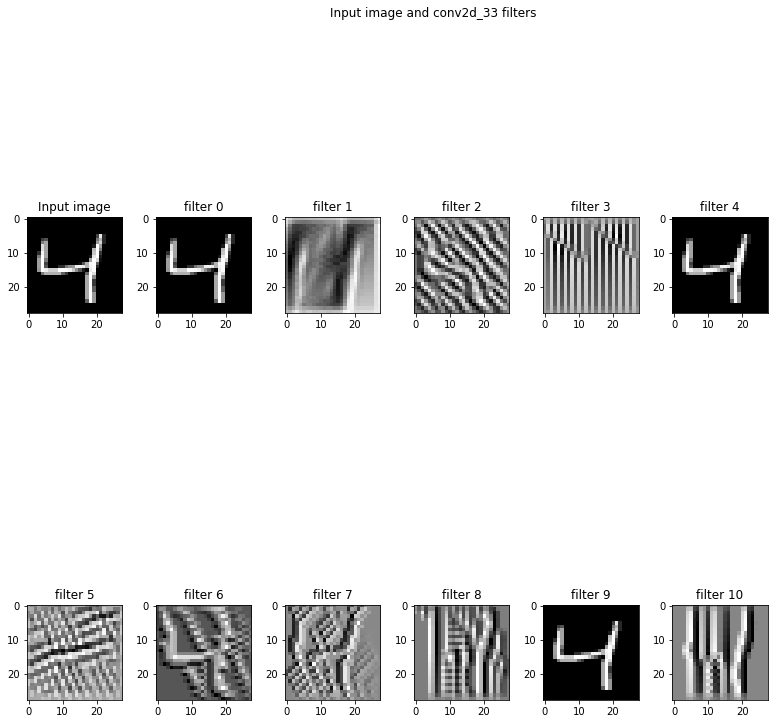

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_33'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## Observation

####Validation Accuracy: 99.31%
####Parameters:56k


## Scope for improvement




1.   Reduce the parameters
2.   Enable validation accuracy check after every epoch






